# Provision

In [1]:
from blocksnet import City, Provision, ProvisionMethod

city = City.from_pickle('../data/model.pickle')

In [6]:
provision = Provision(city_model=city)
service_type = city['school']
result = provision.calculate(service_type, self_supply=True, method=ProvisionMethod.GRAVITATIONAL)

2024-09-11 16:18:05.631 | INFO     | blocksnet.method.provision:_lp_provision:298 - Setting an LP problem
2024-09-11 16:18:31.432 | INFO     | blocksnet.method.provision:_lp_provision:335 - Solving the problem
2024-09-11 16:18:40.866 | INFO     | blocksnet.method.provision:_lp_provision:339 - Restoring values from variables
2024-09-11 16:18:45.710 | SUCCESS  | blocksnet.method.provision:calculate:263 - Provision assessment finished


In [7]:
result.head()

,geometry,demand,capacity,capacity_left,demand_left,demand_within,demand_without,provision
id,,,,,,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",73,0.0,0.0,73.0,0.0,0,0.0
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...",5,0.0,0.0,5.0,0.0,0,0.0
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",2,0.0,0.0,0.0,2.0,0,1.0
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",70,0.0,0.0,70.0,0.0,0,0.0
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",241,0.0,0.0,0.0,241.0,0,1.0


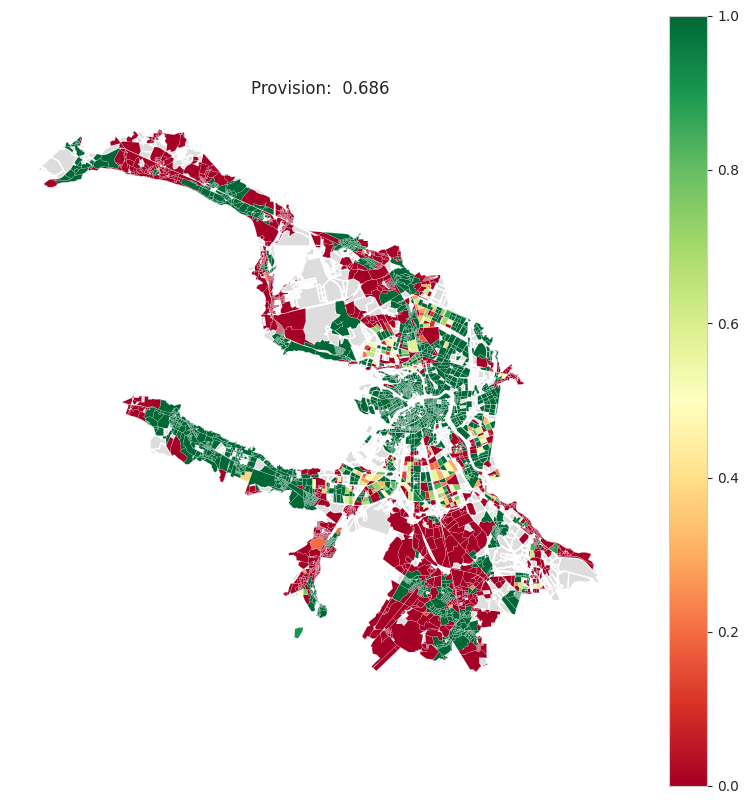

In [37]:
provision.plot(result, figsize=(10,10))

## Update scenario

In [24]:
import pandas as pd

update = {
  3506: {
    'population': 100000
  }
}

update_df = pd.DataFrame.from_dict(update, 'index')
update_df

,population
3506,100000


In [25]:
upd_result = provision.calculate(service_type, update_df, self_supply=True)

2024-09-11 16:32:51.836 | INFO     | blocksnet.method.provision:_lp_provision:298 - Setting an LP problem
2024-09-11 16:33:18.226 | INFO     | blocksnet.method.provision:_lp_provision:335 - Solving the problem
2024-09-11 16:33:27.379 | INFO     | blocksnet.method.provision:_lp_provision:339 - Restoring values from variables
2024-09-11 16:33:32.198 | SUCCESS  | blocksnet.method.provision:calculate:263 - Provision assessment finished


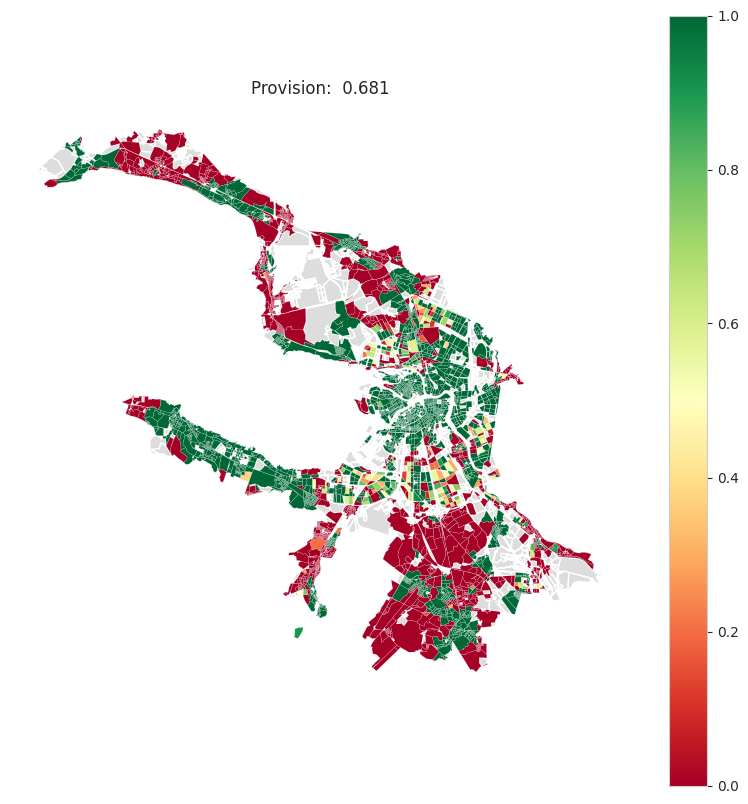

In [38]:
provision.plot(upd_result, figsize=(10,10))

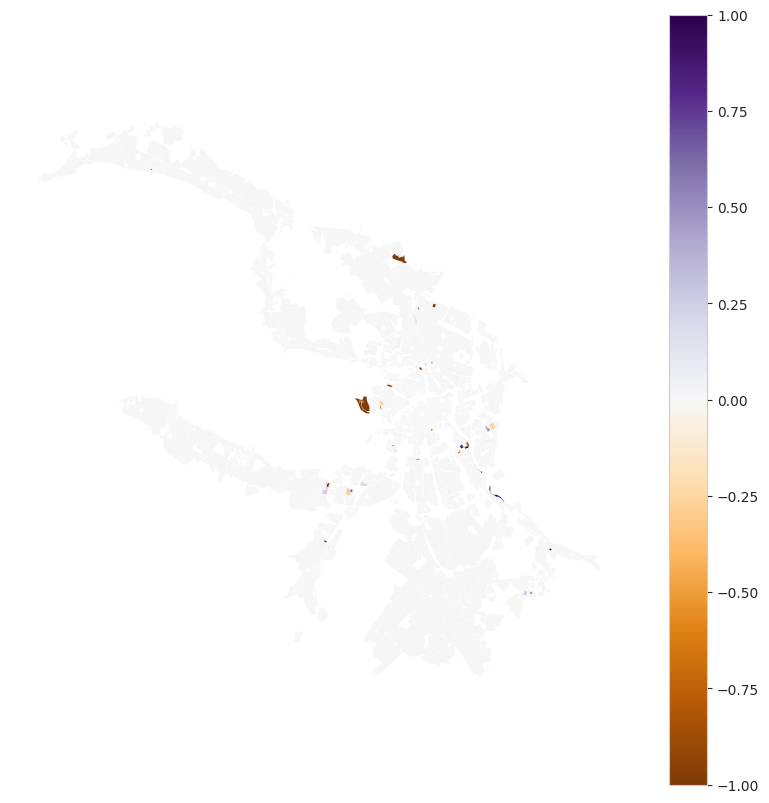

In [39]:
delta_result = upd_result.copy()
delta_result['provision'] -= result['provision']
delta_result.plot(
  column='provision', 
  vmin=-1, 
  vmax=1, 
  legend=True, 
  linewidth=0.1, 
  figsize=(10,10),
  cmap="PuOr"
).set_axis_off()

## Some utilities

Statistics to help user understand the results

In [29]:
provision.stat(result)

{'mean': 0.6198053604179251, 'median': 1.0, 'min': 0.0, 'max': 1.0}

Overall provision assessment

In [30]:
provision.total(result)

0.6863045188572553

Lower and upper bounds of possible provision assessment based on blocks capacities and demands

In [32]:
provision.get_bounds(service_type)

(0.3889247430791169, 0.6996023258100998)